In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold

In [3]:
# Path to the csv file
csv_file = './content/derby-jira-bug-fix-dataset.csv'

# Reading the csv file as a dataframe
df = pd.read_csv(csv_file)

# Displaying the dataframe
print(df)

     Project Owner              Manager  Category         Key Priority  \
0      DERBY   ASF  Apache DB Committee  database  DERBY-4001    Minor   
1      DERBY   ASF  Apache DB Committee  database  DERBY-4006    Major   
2      DERBY   ASF  Apache DB Committee  database  DERBY-4012    Major   
3      DERBY   ASF  Apache DB Committee  database  DERBY-4018    Major   
4      DERBY   ASF  Apache DB Committee  database  DERBY-4025    Major   
...      ...   ...                  ...       ...         ...      ...   
1078   DERBY   ASF  Apache DB Committee  database  DERBY-6981    Major   
1079   DERBY   ASF  Apache DB Committee  database  DERBY-6986    Major   
1080   DERBY   ASF  Apache DB Committee  database  DERBY-6987    Major   
1081   DERBY   ASF  Apache DB Committee  database  DERBY-7016    Major   
1082   DERBY   ASF  Apache DB Committee  database  DERBY-7020    Major   

        Status        Reporter        Assignee      Components  ...  \
0       Closed           viyer      knut

In [4]:
#data preprossesing
# Drop columns with too many missing values(>)
df = df.dropna(axis=1, thresh=len(df) * 0.5)

In [5]:
df

,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,...,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches
0,DERBY,ASF,Apache DB Committee,database,DERBY-4001,Minor,Closed,viyer,knutanders,SQL,...,10.3.2.1,10.6.1.0 10.5.2.0,17,2009-01-05T10:13:54.685+0000,2009-04-28T11:43:51.666+0000,0,3,2009-04-14T13:36:00.721+0000,2009-04-21T13:30:44.424+0000,0
1,DERBY,ASF,Apache DB Committee,database,DERBY-4006,Major,Closed,knutanders,bryanpendleton,SQL,...,10.4.2.0 10.4.1.3 10.3.3.0 10.3.2.1 10.3.1.4 1...,10.5.1.1 10.4.2.1,20,2009-01-08T12:04:43.214+0000,2009-01-19T18:09:38.280+0000,0,4,2009-01-08T17:06:09.484+0000,2009-01-12T18:09:04.118+0000,1
2,DERBY,ASF,Apache DB Committee,database,DERBY-4012,Major,Closed,olesolberg,kristwaa,Test,...,10.5.1.1,10.5.1.1,3,2009-01-09T13:38:33.741+0000,2009-01-12T18:40:23.920+0000,0,1,2009-01-09T13:49:18.722+0000,2009-01-09T13:49:18.722+0000,0
3,DERBY,ASF,Apache DB Committee,database,DERBY-4018,Major,Closed,clary2137,knutanders,Services,...,10.4.2.0,10.6.1.0 10.5.2.0,11,2009-01-13T14:48:07.608+0000,2009-07-01T22:29:01.488+0000,0,6,2009-01-13T14:48:07.571+0000,2009-06-29T15:14:16.076+0000,0
4,DERBY,ASF,Apache DB Committee,database,DERBY-4025,Major,Closed,kristwaa,chaase3,Documentation,...,10.5.1.1,10.5.1.1,7,2009-01-21T21:48:15.873+0000,2009-01-26T08:11:57.250+0000,0,4,2009-01-21T21:48:15.835+0000,2009-01-22T21:38:38.600+0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,DERBY,ASF,Apache DB Committee,database,DERBY-6981,Major,Resolved,masterchief24,bryanpendleton,JDBC,...,10.12.1.1,10.15.1.3,8,2018-01-31T05:26:35.628+0000,2018-02-08T02:50:05.669+0000,0,5,2018-01-31T05:24:23.576+0000,2018-02-01T05:32:28.490+0000,1
1079,DERBY,ASF,Apache DB Committee,database,DERBY-6986,Major,Resolved,bryanpendleton,bryanpendleton,Network Server,...,10.14.1.0,10.14.2.0,0,NaN,NaN,0,1,2018-03-19T00:38:59.101+0000,2018-03-19T00:38:59.101+0000,0
1080,DERBY,ASF,Apache DB Committee,database,DERBY-6987,Major,Resolved,bryanpendleton,bryanpendleton,Network Server,...,10.14.1.0,10.14.2.0,0,NaN,NaN,0,1,2018-03-19T00:45:13.559+0000,2018-03-19T00:45:13.559+0000,0
1081,DERBY,ASF,Apache DB Committee,database,DERBY-7016,Major,Closed,rhillegas,rhillegas,Demos/Scripts,...,10.15.1.3,10.15.1.3,11,2018-11-11T12:49:59.731+0000,2018-11-29T22:33:27.333+0000,0,2,2018-11-11T12:49:36.031+0000,2018-11-14T15:42:19.768+0000,0


In [6]:
df.head()

,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,...,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches
0,DERBY,ASF,Apache DB Committee,database,DERBY-4001,Minor,Closed,viyer,knutanders,SQL,...,10.3.2.1,10.6.1.0 10.5.2.0,17,2009-01-05T10:13:54.685+0000,2009-04-28T11:43:51.666+0000,0,3,2009-04-14T13:36:00.721+0000,2009-04-21T13:30:44.424+0000,0
1,DERBY,ASF,Apache DB Committee,database,DERBY-4006,Major,Closed,knutanders,bryanpendleton,SQL,...,10.4.2.0 10.4.1.3 10.3.3.0 10.3.2.1 10.3.1.4 1...,10.5.1.1 10.4.2.1,20,2009-01-08T12:04:43.214+0000,2009-01-19T18:09:38.280+0000,0,4,2009-01-08T17:06:09.484+0000,2009-01-12T18:09:04.118+0000,1
2,DERBY,ASF,Apache DB Committee,database,DERBY-4012,Major,Closed,olesolberg,kristwaa,Test,...,10.5.1.1,10.5.1.1,3,2009-01-09T13:38:33.741+0000,2009-01-12T18:40:23.920+0000,0,1,2009-01-09T13:49:18.722+0000,2009-01-09T13:49:18.722+0000,0
3,DERBY,ASF,Apache DB Committee,database,DERBY-4018,Major,Closed,clary2137,knutanders,Services,...,10.4.2.0,10.6.1.0 10.5.2.0,11,2009-01-13T14:48:07.608+0000,2009-07-01T22:29:01.488+0000,0,6,2009-01-13T14:48:07.571+0000,2009-06-29T15:14:16.076+0000,0
4,DERBY,ASF,Apache DB Committee,database,DERBY-4025,Major,Closed,kristwaa,chaase3,Documentation,...,10.5.1.1,10.5.1.1,7,2009-01-21T21:48:15.873+0000,2009-01-26T08:11:57.250+0000,0,4,2009-01-21T21:48:15.835+0000,2009-01-22T21:38:38.600+0000,0


In [7]:
#printing the summary of the dataset for better understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project              1083 non-null   object
 1   Owner                1083 non-null   object
 2   Manager              1083 non-null   object
 3   Category             1083 non-null   object
 4   Key                  1083 non-null   object
 5   Priority             1083 non-null   object
 6   Status               1083 non-null   object
 7   Reporter             1083 non-null   object
 8   Assignee             1029 non-null   object
 9   Components           1071 non-null   object
 10  SummaryTopWords      1073 non-null   object
 11  DescriptionTopWords  1079 non-null   object
 12  CommentsTopWords     1081 non-null   object
 13  CreationDate         1083 non-null   object
 14  ResolutionDate       1083 non-null   object
 15  AffectsVersions      994 non-null    object
 16  FixVer

In [8]:
#checking for number of null values in each column
df.isnull().sum()

Project                  0
Owner                    0
Manager                  0
Category                 0
Key                      0
Priority                 0
Status                   0
Reporter                 0
Assignee                54
Components              12
SummaryTopWords         10
DescriptionTopWords      4
CommentsTopWords         2
CreationDate             0
ResolutionDate           0
AffectsVersions         89
FixVersions             24
NoComments               0
FirstCommentDate         2
LastCommentDate          2
NoWatchers               0
NoAttachments            0
FirstAttachmentDate    100
LastAttachmentDate     100
NoAttachedPatches        0
dtype: int64

In [9]:
#filling missing values with the values of previous row using fillna function
df = df.ffill()

In [10]:
#again checking null values sum after filling null values
df.isnull().sum()

Project                0
Owner                  0
Manager                0
Category               0
Key                    0
Priority               0
Status                 0
Reporter               0
Assignee               0
Components             0
SummaryTopWords        0
DescriptionTopWords    0
CommentsTopWords       0
CreationDate           0
ResolutionDate         0
AffectsVersions        0
FixVersions            0
NoComments             0
FirstCommentDate       0
LastCommentDate        0
NoWatchers             0
NoAttachments          0
FirstAttachmentDate    0
LastAttachmentDate     0
NoAttachedPatches      0
dtype: int64

In [11]:
# Converting the categorical variables to numeric using LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
#checking if values are converted to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Project              1083 non-null   int32
 1   Owner                1083 non-null   int32
 2   Manager              1083 non-null   int32
 3   Category             1083 non-null   int32
 4   Key                  1083 non-null   int32
 5   Priority             1083 non-null   int32
 6   Status               1083 non-null   int32
 7   Reporter             1083 non-null   int32
 8   Assignee             1083 non-null   int32
 9   Components           1083 non-null   int32
 10  SummaryTopWords      1083 non-null   int32
 11  DescriptionTopWords  1083 non-null   int32
 12  CommentsTopWords     1083 non-null   int32
 13  CreationDate         1083 non-null   int32
 14  ResolutionDate       1083 non-null   int32
 15  AffectsVersions      1083 non-null   int32
 16  FixVersions          108

In [13]:
# Define target and features
target_col = 'Priority'
X = df.drop(columns=[target_col])
y = df[target_col]

In [14]:
# Handle class imbalance using SMOTE
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

Applying SMOTE to balance the dataset...
Scaling features...


In [16]:
# splitting train test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)

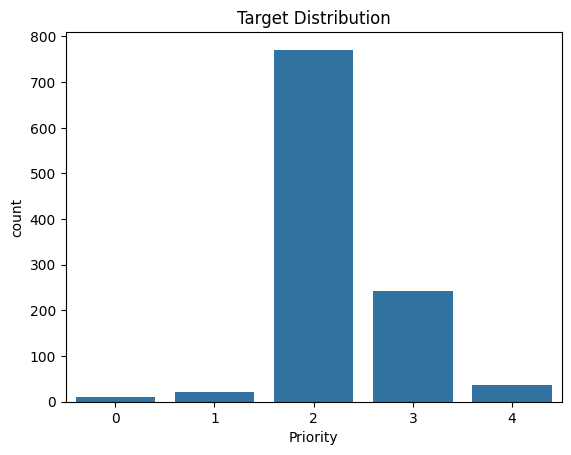

In [17]:
# Data visualization
# Ploting target distribution
sns.countplot(x=target_col, data=df)
plt.title("Target Distribution")
plt.show()


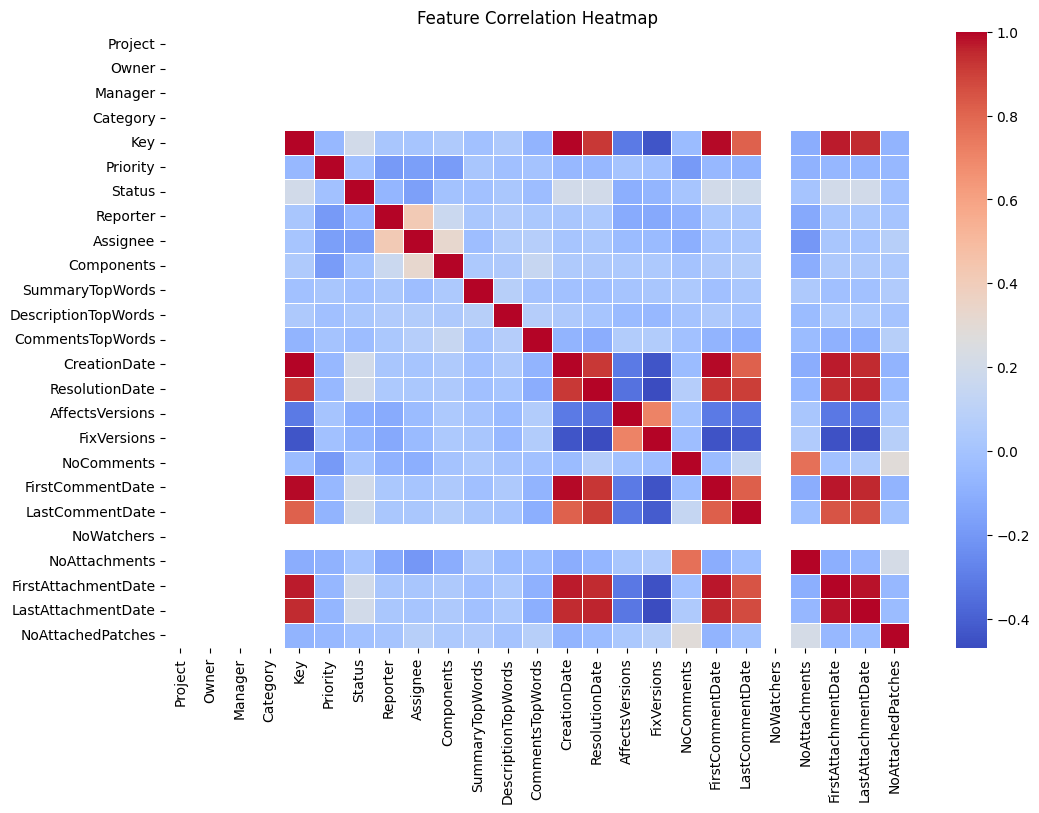

In [18]:
# Heatmap for correlations of columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
#Remove constant features
constant_filter = VarianceThreshold(threshold=0.0)
X_filtered = pd.DataFrame(constant_filter.fit_transform(X), columns=X.columns[constant_filter.get_support()])
print(f"Removed constant features. Remaining features: {X_filtered.shape[1]}")


# Feature engineering
# Select top K features
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_filtered, y)

# Get the selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X_filtered.columns[selected_indices]
print("Selected Features:", selected_features)

Removed constant features. Remaining features: 19
Selected Features: Index(['Key', 'Reporter', 'Assignee', 'Components', 'CreationDate',
       'NoComments', 'FirstCommentDate', 'LastCommentDate',
       'FirstAttachmentDate', 'LastAttachmentDate'],
      dtype='object')


In [20]:
# models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

In [21]:
 # Dictionary to store evaluation metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "Recall": [],
    "Precision": []
}

In [22]:
# Train and evaluate models
best_model = None
best_f1_score = 0


In [23]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Store metrics
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["F1 Score"].append(f1)
    metrics["Recall"].append(recall)
    metrics["Precision"].append(precision)

    # Update best model
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = (name, model)


In [24]:
# Convert metrics to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)
print("Model Performance:")
print(metrics_df)



Model Performance:
                    Model   Accuracy  F1 Score    Recall  Precision
0     Logistic Regression  54.969749  0.543163  0.549697   0.546485
1           Random Forest  91.702679  0.915936  0.917027   0.915374
2           Decision Tree  83.837511  0.836117  0.838375   0.835229
3  Support Vector Machine  61.797753  0.600138  0.617978   0.615525


In [25]:
# Best Model
print(f"\nBest Model: {best_model[0]} with F1 Score: {best_f1_score}")



Best Model: Random Forest with F1 Score: 0.915936135457852


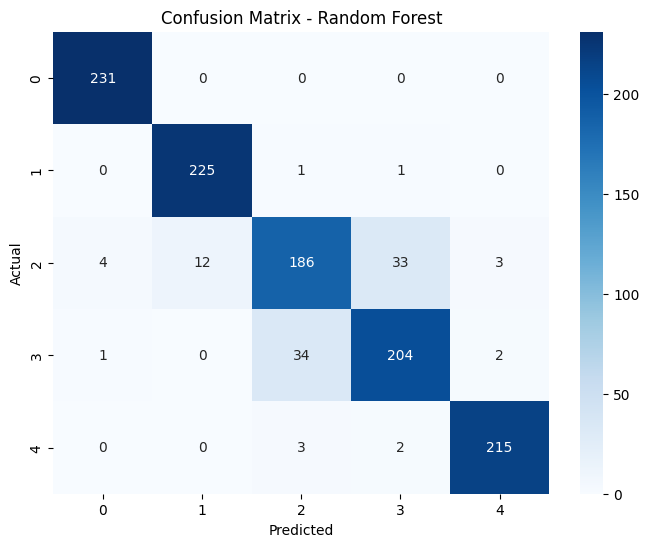

In [26]:
# Confusion Matrix for the Best Model
best_name, best_model_instance = best_model
y_pred_best = best_model_instance.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix - {best_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
# Classification Report for the Best Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       231
           1       0.95      0.99      0.97       227
           2       0.83      0.78      0.81       238
           3       0.85      0.85      0.85       241
           4       0.98      0.98      0.98       220

    accuracy                           0.92      1157
   macro avg       0.92      0.92      0.92      1157
weighted avg       0.92      0.92      0.92      1157

